# Sentiment Classification


## Loading the dataset

In [0]:
from keras.datasets import imdb

vocab_size = 10000 #vocab size

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size) # vocab_size is no.of words to consider from the dataset, ordering based on frequency.

Using TensorFlow backend.


17465344/17464789 [==============================] - 3s 0us/step


In [0]:
from keras.preprocessing.sequence import pad_sequences
vocab_size = 10000 #vocab size
maxlen = 300  #number of word used from each review

## Train test split

In [0]:
#load dataset as a list of ints
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
#make all sequences of the same length
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test =  pad_sequences(x_test, maxlen=maxlen)

In [0]:
print('Loaded dataset with {} training samples, {} test samples'.format(len(x_train), len(x_test)))

Loaded dataset with 25000 training samples, 25000 test samples


## Build Keras Embedding Layer Model
We can think of the Embedding layer as a dicionary that maps a index assigned to a word to a word vector. This layer is very flexible and can be used in a few ways:

* The embedding layer can be used at the start of a larger deep learning model. 
* Also we could load pre-train word embeddings into the embedding layer when we create our model.
* Use the embedding layer to train our own word2vec models.

The keras embedding layer doesn't require us to onehot encode our words, instead we have to give each word a unqiue intger number as an id. For the imdb dataset we've loaded this has already been done, but if this wasn't the case we could use sklearn [LabelEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html).

In [0]:
word2id = imdb.get_word_index()
id2word = {i: word for word, i in word2id.items()}

print('---review with words---')
print([id2word.get(i, ' ') for i in x_train[6]])

print('---label---')
print(y_train[6])

1646592/1641221 [==============================] - 1s 1us/step
---review with words---
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'the', 'boiled', 'full', 'i

In [0]:
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

embedding_vector_length = 32

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_vector_length, input_length=maxlen))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 32)           320000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 300, 32)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               8448      
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
______________________________________

In [0]:
batch_size = 64
num_epochs = 10

x_valid, y_valid = x_train[:batch_size], y_train[:batch_size]
x_train_, y_train_ = x_train[batch_size:], y_train[batch_size:]


train_history = model.fit(x_train_, y_train_, 
                          validation_data=(x_valid, y_valid), 
                          batch_size=batch_size, 
                          epochs=num_epochs, verbose=2)




Train on 24936 samples, validate on 64 samples
Epoch 1/10





 - 242s - loss: 0.4014 - acc: 0.8113 - val_loss: 0.2321 - val_acc: 0.9219
Epoch 2/10
 - 234s - loss: 0.2335 - acc: 0.9098 - val_loss: 0.1874 - val_acc: 0.9219
Epoch 3/10
 - 233s - loss: 0.1783 - acc: 0.9329 - val_loss: 0.2470 - val_acc: 0.9062
Epoch 4/10
 - 233s - loss: 0.1397 - acc: 0.9482 - val_loss: 0.3034 - val_acc: 0.8906
Epoch 5/10
 - 231s - loss: 0.1043 - acc: 0.9630 - val_loss: 0.3268 - val_acc: 0.8906
Epoch 6/10
 - 233s - loss: 0.0891 - acc: 0.9677 - val_loss: 0.4405 - val_acc: 0.8750
Epoch 7/10
 - 235s - loss: 0.0719 - acc: 0.9741 - val_loss: 0.4734 - val_acc: 0.8750
Epoch 8/10
 - 233s - loss: 0.0580 - acc: 0.9806 - val_loss: 0.6597 - val_acc: 0.8906
Epoch 9/10
 - 235s - loss: 0.0548 - acc: 0.9813 - val_loss: 0.4783 - val_acc: 0.8906
Epoch 10/10
 - 232s - loss: 0.0465 - acc: 0.9853 - val_loss: 0.5750 - val_acc: 0.9062


In [0]:
import matplotlib.pyplot as plt

def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

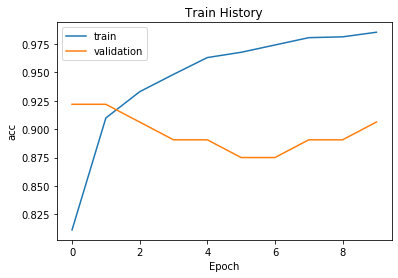

In [0]:
show_train_history(train_history,'acc','val_acc')

In [0]:
# Evaluate model by test set
scores = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', scores[1])

# Predict test data
predict=model.predict_classes(x_test)
predict_classes=predict.reshape(len(x_test))

Test accuracy: 0.851


## Retrive the output of each layer in keras for a given single test sample from the trained model you built

In [0]:
from keras import backend as K
import numpy as np

In [0]:
inp = model.input                                           # input placeholder
outputs = [layer.output for layer in model.layers]          # all layer outputs
functors = [K.function([inp, K.learning_phase()], [out]) for out in outputs]    # evaluation functions

# Testing
#test = np.random.random(input_shape)[np.newaxis,...]
test_sample = x_test[0].reshape(1,-1)
layer_outs = [func([test_sample, 1.]) for func in functors]

for index, layer in enumerate(layer_outs):
    print(f'\nOutput of layer {index}, shape {np.array(layer_outs[index]).shape}  ------>')
    print(layer_outs[index])


Output of layer 0, shape (1, 1, 300, 32)  ------>
[array([[[-0.04999315,  0.00551191,  0.06298603, ..., -0.03516566,
         -0.01786362,  0.0098074 ],
        [-0.04999315,  0.00551191,  0.06298603, ..., -0.03516566,
         -0.01786362,  0.0098074 ],
        [-0.04999315,  0.00551191,  0.06298603, ..., -0.03516566,
         -0.01786362,  0.0098074 ],
        ...,
        [ 0.02320201,  0.00728727,  0.05734314, ..., -0.00841749,
         -0.02756022,  0.03565748],
        [-0.03787236,  0.01771588, -0.01316862, ...,  0.00106458,
          0.02452109, -0.01197266],
        [ 0.13999961, -0.13356502, -0.00820625, ..., -0.03694197,
         -0.0055538 , -0.07904448]]], dtype=float32)]

Output of layer 1, shape (1, 1, 300, 32)  ------>
[array([[[-0.06249144,  0.00688989,  0.07873254, ..., -0.04395708,
         -0.02232952,  0.01225925],
        [-0.        ,  0.00688989,  0.07873254, ..., -0.04395708,
         -0.02232952,  0.01225925],
        [-0.06249144,  0.00688989,  0.07873254, .